## 1. 외식 POS 데이터 (업종·메뉴 단위 고해상도)

### 단독 분석 시나리오
- **목표**: 업종별·메뉴별 판매 트렌드 분석  
- **변수**: 기준년월, 업종명_중분류/소분류, 메뉴명_소분류, 판매수량, 결제금액  
- **방법**:  
  1. 월별 시계열 추이(판매량·매출)  
  2. 계절성·프로모션 효과 탐지(요일·휴일 별 비교)  
- **의의**: 예비 창업자에게 유망 업종·메뉴 추천  

### 단가(정가)와 실제 매출의 GAP 분석
- **변수**: 단가 vs 결제금액/판매수량  
- **방법**:  
  1. 메뉴별 할인율·구성비 판별  
  2. 이익 마진 최적화 모델 제안  

### 신메뉴 효과성 평가
- **변수**: 특정 신메뉴 출시 전후 매출 변화  
- **방법**:  
  1. A/B 테스트 스타일 비교  
  2. 회귀분석(신메뉴 더미 변수 포함)  

---

## 2. 외식 POS 메뉴 데이터 (점포 단위 핵심 메뉴 지표)

### 단독 분석 시나리오
- **목표**: 주메뉴 판매율과 점포 성과 상관관계  
- **변수**: 취급메뉴_개수, 주메뉴_판매율, 주메뉴_가격, 고급음식점_여부  
- **방법**:  
  1. 상관분석/회귀분석  
  2. 고급점포 vs 일반점포 비교  

### 메뉴 다양성 vs 매출 상관성 분석
- **변수**: 취급메뉴_개수, 점포별 월평균 매출 (별도 POS 데이터 결합 시)  
- **방법**:  
  1. 군집화(High-/Low-diversity)  
  2. 성과 차이 검증(t-검정, ANOVA)  

### 가격대별 소비자 민감도 분석
- **변수**: 주메뉴_가격, 주메뉴_판매율  
- **방법**:  
  1. 수요 탄력도 추정  
  2. 가격 시뮬레이션(가격 변화에 따른 예상 매출)  

---

## 3. 서울시 유동인구 정보

### 단독 분석 시나리오
- **목표**: 시간대·공간별 유동인구 패턴 분석  
- **변수**: 셀번호(또는 행정동코드), 일자, 시간대, 소계(남녀합계)  
- **방법**:  
  1. Heatmap(시간대×행정동)  
  2. 피크 타임 식별  

### 연령·성별별 유동성 프로파일링
- **변수**: 남성/여성 각 연령대 컬럼  
- **방법**: 피벗테이블로 연령대별 유동인구 구성비 분석  

### 시즌별(월간) 변화 트렌드
- **방법**: 월별 유동인구 변화 시계열 분석  

### 공공 인프라 최적화
- **변수**: 유동인구 밀집 지역  
- **방법**:  
  1. Cluster(밀집지역)  
  2. CCTV/Wi-Fi/전기차충전소 설치 후보지 추천  

---

## 4. 데이터 결합 시나리오

### A. POS 데이터(업종·메뉴) + 유동인구
- **분석 주제**: 상권 수요 예측 모델링  
- **아이디어**:  
  - 시간대·행정동별 유동인구 + 권역별 POS 매출 결합 → 회귀/머신러닝 매출 예측  
- **효과**:  
  - 신규 점포 입점 시 예상 매출 산정  
  - 프로모션 시간대 최적화  
  - 메뉴별 타겟 마케팅  
    - 특정 연령대·성별 유동인구 밀집 시간대 프로모션 실행 → 광고 효율 극대화  

### B. POS 메뉴 데이터 + POS 업종·메뉴 데이터
- **분석 주제**: 점포 성과 개선 인사이트  
- **아이디어**:  
  1. 메뉴 다양성·주메뉴 판매율 + 상세 POS 매출 결합 → 메뉴 구성 최적화 가이드라인 도출  
  2. 메뉴 단가 정보 + 거래량 활용 → 가격 인상/인하 시 시뮬레이션 모델 구현  

### C. 세 데이터 통합 (유동인구 + POS 업종 + POS 메뉴)
- **분석 주제**: 옴니채널 상권 전략 플랫폼  
- **아이디어**:  
  1. time × location × menu 3차원 수요 매트릭스 구축  
  2. 자동화된 ‘입점·메뉴·가격·프로모션’ 종합 추천 엔진  
  3. 동적 가격·프로모션 최적화  
     - 실시간 유동인구 변화에 따른 메뉴별 할인율 자동 조정  
     - 머신러닝 기반 수요 예측 및 최적 프로모션 스케줄링  


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
from sklearn.linear_model import LinearRegression

# 운영체제에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스용 나눔폰트 설치 필요

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df_pos = pd.read_csv('data/pos.csv', parse_dates=['구매일자'], encoding='utf-8-sig')
df_menu = pd.read_csv('data/menu.csv', encoding='utf-8-sig')
df_pop = pd.read_csv('data/population.csv', parse_dates=['일자'], encoding='utf-8-sig')

Trend sample:
   year_month 업종명_중분류 메뉴명_소분류  판매수량    결제금액
0    2022-11      분식      냉면    34  530003
1    2022-11      분식     떡볶이    47  901135
2    2022-11      분식    연어초밥    18  334931
3    2022-11      분식  필렛스테이크    22  296727
4    2022-11      양식      냉면    30  433794 



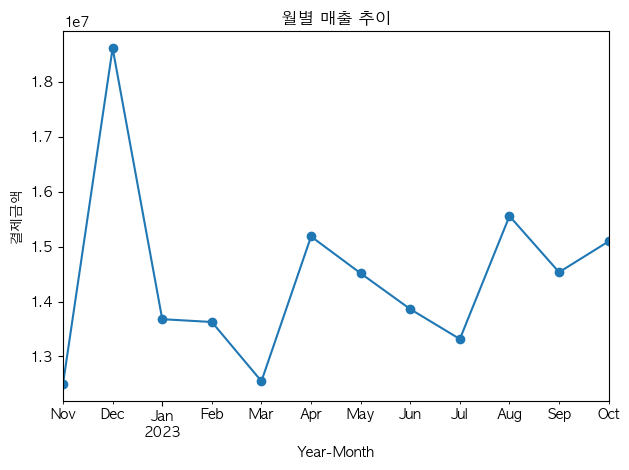

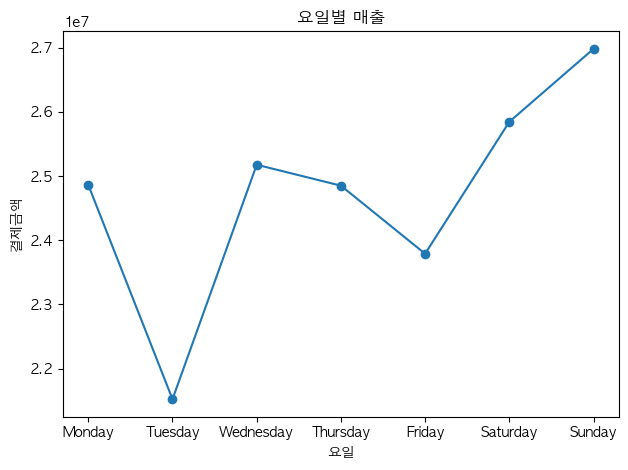

In [8]:
# A) 업종별·메뉴별 판매 트렌드 분석
df_pos['year_month'] = df_pos['구매일자'].dt.to_period('M')
trend = df_pos.groupby(['year_month','업종명_중분류','메뉴명_소분류'])[['판매수량','결제금액']].sum().reset_index()
print("Trend sample:\n", trend.head(), "\n")

# 월별 전체 매출 추이
monthly = df_pos.groupby('year_month')['결제금액'].sum()
plt.figure()
monthly.plot(marker='o')
plt.title('월별 매출 추이')
plt.xlabel('Year-Month')
plt.ylabel('결제금액')
plt.tight_layout()
plt.show()

# 요일별 매출 비교
df_pos['weekday'] = df_pos['구매일자'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
wd_trend = df_pos.groupby('weekday')['결제금액'].sum().reindex(weekday_order)
plt.figure()
wd_trend.plot(marker='o')
plt.title('요일별 매출')
plt.xlabel('요일')
plt.ylabel('결제금액')
plt.tight_layout()
plt.show()


In [10]:

# B) 주메뉴 판매율과 점포 성과 상관관계
corr = df_menu[['취급메뉴_개수','주메뉴_판매율','주메뉴_가격']].corr()
print("상관행렬:\n", corr, "\n")
print("고급음식점 vs 일반 평균 판매율:\n", df_menu.groupby('고급음식점_여부')['주메뉴_판매율'].mean(), "\n")


상관행렬:
           취급메뉴_개수   주메뉴_판매율    주메뉴_가격
취급메뉴_개수  1.000000  0.003788 -0.006157
주메뉴_판매율  0.003788  1.000000 -0.031437
주메뉴_가격  -0.006157 -0.031437  1.000000 

고급음식점 vs 일반 평균 판매율:
 고급음식점_여부
0    49.194107
1    49.672235
Name: 주메뉴_판매율, dtype: float64 



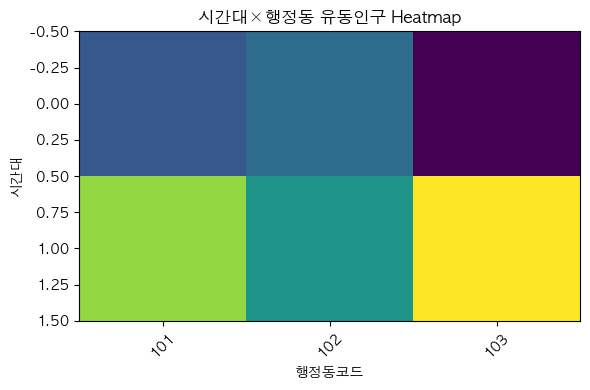

In [12]:
# C) 시간대·공간별 유동인구 패턴 분석
pivot = df_pop.pivot_table(index='시간대', columns='행정동코드', values='소계(남녀합계)', aggfunc='sum')
plt.figure(figsize=(6,4))
plt.imshow(pivot, aspect='auto')
plt.title('시간대×행정동 유동인구 Heatmap')
plt.xlabel('행정동코드')
plt.ylabel('시간대')
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# D) 상권 수요 예측 모델링 (유동인구→POS 매출)
df_pos['일자'] = df_pos['구매일자'].dt.normalize()
df_pos['시간대'] = df_pos['구매일자'].dt.hour
merged = pd.merge(df_pos, df_pop, on=['행정동코드','일자','시간대'], how='inner')
if not merged.empty:
    X = merged[['소계(남녀합계)']]
    y = merged['결제금액']
    model = LinearRegression()
    model.fit(X, y)
    print("수요 예측 모델 R²:", model.score(X, y))
else:
    print("Merged data is empty. Check overlapping periods and time slots.")


수요 예측 모델 R²: 0.0037516132518149448


In [20]:
# E) 메뉴별 타겟 마케팅: 시간대별 인기 메뉴
top_menus = df_pos.groupby(['시간대','메뉴명_소분류'])['판매수량'] \
                  .sum() \
                  .reset_index() \
                  .sort_values(['시간대','판매수량'], ascending=[True,False])
print("시간대별 상위 메뉴:\n", top_menus.groupby('시간대').head(3))

시간대별 상위 메뉴:
      시간대 메뉴명_소분류  판매수량
1      0     떡볶이    90
0      0      냉면    80
3      0    연어초밥    75
9      1  필렛스테이크   159
8      1    연어초밥   115
..   ...     ...   ...
110   22      냉면    94
111   22     떡볶이    83
119   23  필렛스테이크   121
115   23      냉면   106
118   23    연어초밥    87

[72 rows x 3 columns]
